In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('titanic_toy.csv')

In [7]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [15]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [19]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((712, 3), (179, 3))

In [25]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()

fare_mean = df['Fare'].mean()
fare_median = df['Fare'].median

In [27]:
X_train['Age_mean'] = X_train['Age'].fillna(age_mean)
X_train['Age_median'] = X_train['Age'].fillna(age_median)

X_train['Fare_mean'] = X_train['Fare'].fillna(fare_mean)
X_train['Fare_median'] = X_train['Fare'].fillna(fare_median)

In [71]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
645,48.0,76.7292,1,48.000000,48.0,76.729200,76.7292
229,NaN,NaN,4,29.699118,28.0,32.279338,<bound method Series.median of 0 7.2500\...
454,NaN,8.0500,0,29.699118,28.0,8.050000,8.05
470,NaN,7.2500,0,29.699118,28.0,7.250000,7.25
198,NaN,7.7500,0,29.699118,28.0,7.750000,7.75


AttributeError: 'Axes' object has no attribute 'get_legend_handles_lables'

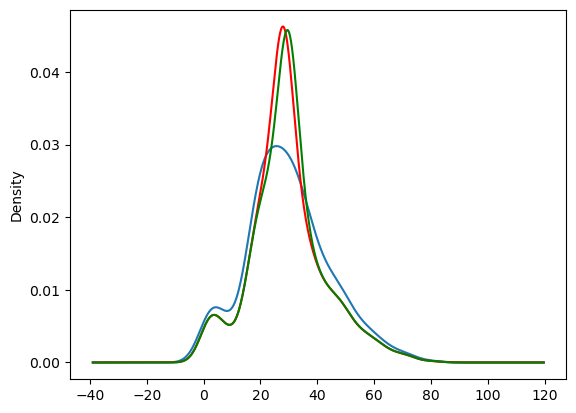

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)

X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_lables()
ax.legend(lines, labels, loc='best')

TypeError: no numeric data to plot

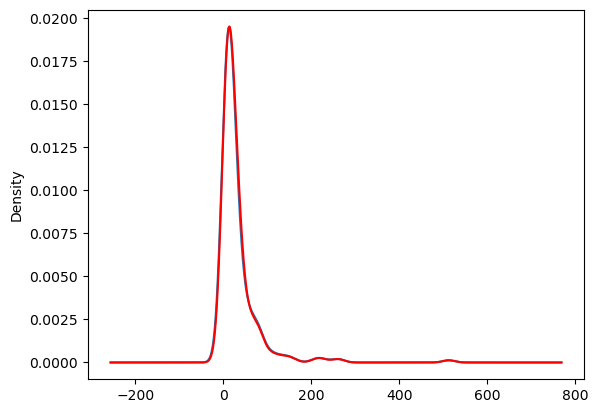

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)

X_train['Fare_mean'].plot(kind='kde', ax=ax, color='red')

X_train['Fare_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_lables()
ax.legend(lines, labels, loc='best')

In [49]:
X_train.cov(numeric_only=True)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean
Age,213.716509,84.480223,-6.393469,213.716509,213.716509,79.574443
Fare,84.480223,2574.352621,17.050423,67.571296,70.448094,2574.352621
Family,-6.393469,17.050423,2.770177,-5.125313,-5.115968,16.111325
Age_mean,213.716509,67.571296,-5.125313,171.334247,171.346696,63.867618
Age_median,213.716509,70.448094,-5.115968,171.346696,171.818292,66.588240
Fare_mean,79.574443,2574.352621,16.111325,63.867618,66.588240,2433.151455


In [75]:
X_train.corr(numeric_only=True)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean
Age,1.000000,0.106334,-0.295318,1.000000,1.000000,0.103935
Fare,0.106334,1.000000,0.198661,0.101175,0.105335,1.000000
Family,-0.295318,0.198661,1.000000,-0.235258,-0.234498,0.196242
Age_mean,1.000000,0.101175,-0.235258,1.000000,0.998663,0.098918
Age_median,1.000000,0.105335,-0.234498,0.998663,1.000000,0.102986
Fare_mean,0.103935,1.000000,0.196242,0.098918,0.102986,1.000000


<Axes: >

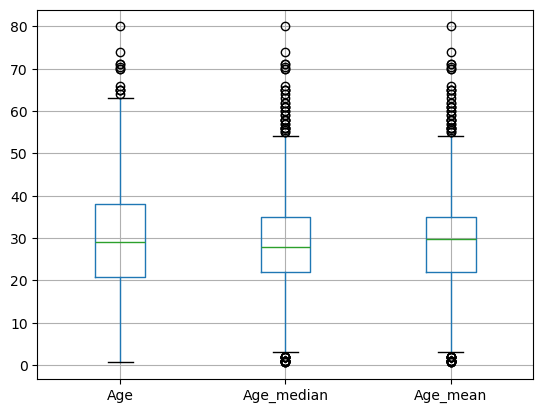

In [77]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((712, 3), (179, 3))

In [83]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [87]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
] , remainder='passthrough')

In [89]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [93]:
trf.named_transformers_['imputer1'].statistics_

array([29.74518389])

In [95]:
trf.named_transformers_['imputer2'].statistics_

array([14.4542])

In [97]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [99]:
X_train

array([[29.74518389, 15.2458    ,  2.        ],
       [31.        , 10.5       ,  0.        ],
       [31.        , 37.0042    ,  2.        ],
       ...,
       [29.74518389,  7.7333    ,  0.        ],
       [36.        , 17.4       ,  1.        ],
       [60.        , 39.        ,  2.        ]])

# Arbitrary Value Imputation

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((712, 3), (179, 3))

In [104]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [106]:
X_train.head()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
140,NaN,15.2458,2,99.0,-1.0,15.2458,15.2458
439,31.0,10.5000,0,31.0,31.0,10.5000,10.5000
817,31.0,37.0042,2,31.0,31.0,37.0042,37.0042
378,20.0,NaN,0,20.0,20.0,999.0000,-1.0000
491,21.0,7.2500,0,21.0,21.0,7.2500,7.2500


AttributeError: 'Axes' object has no attribute 'get_legend_handles_lables'

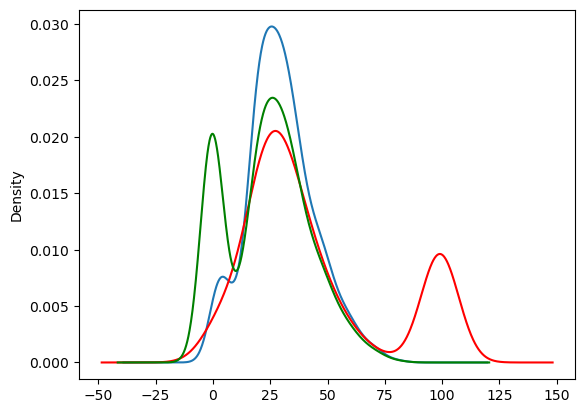

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)

X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_lables()
ax.legend(lines, labels, loc='best')

AttributeError: 'Axes' object has no attribute 'get_legend_handles_lables'

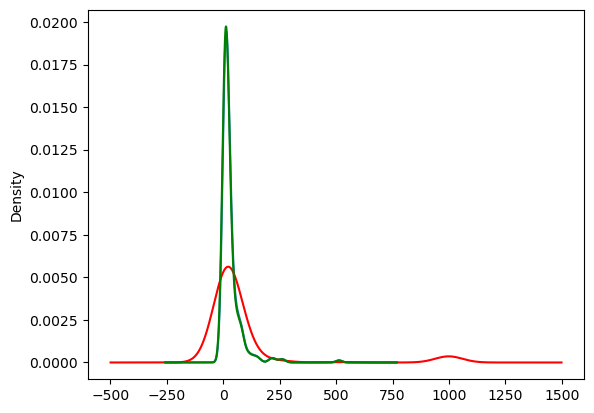

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)

X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_lables()
ax.legend(lines, labels, loc='best')

<Axes: >

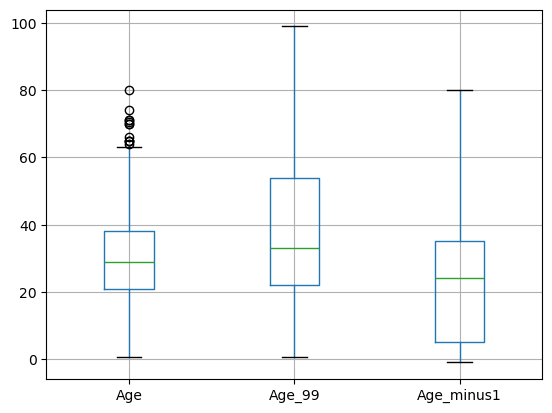

In [112]:
X_train[['Age','Age_99','Age_minus1']].boxplot()

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((712, 3), (179, 3))

In [118]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [120]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [122]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [126]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [130]:
trf.named_transformers_['imputer2'].statistics_

array([999.])